In [1]:
import numpy as np
import scanpy as sc
import anndata as ad

In [2]:
data_path = 'data/test_data.h5ad'
adata = sc.read_h5ad(data_path)
adata

AnnData object with n_obs × n_vars = 48344 × 16906
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Stage_Code', 'Tissue', 'Risk_Category', 'First_Avail_TP', 'MYCN_Status', 'ALK_Status', 'TP53_Status', 'Response', 'Vital_Status', 'Age_at_IDX_in_months', 'Treatment', 'First_Avail_Time_Point', 'sample_name', 'biospecimen_id', 'percent.mt', 'seurat_clusters', 'sample_label_wo_prefix', 'S.Score', 'G2M.Score', 'Phase', 'malignancy', 'cell_state', 'RNA_snn_res.0.2', 'MES_Score', 'ADRN_Score', 'MES_ADRN_diff', 'Event', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'tissue_type', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'

In [3]:
embeddings = np.load("output/embeddings_mini_dataset.npy.npz")["arr"]
embeddings.shape

(48344, 200)

In [4]:
i = embeddings.shape[0]

aembed = sc.AnnData(embeddings[:i])
aembed.obs = adata[:i].obs
aembed.obs_names = adata[:i].obs_names
#aembed.uns = adata[:i].uns
aembed

/opt/anaconda3/envs/scbert/lib/python3.10/site-packages/anndata/_core/anndata.py:787: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  getattr(self, attr).index = value
/opt/anaconda3/envs/scbert/lib/python3.10/site-packages/anndata/_core/anndata.py:787: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  getattr(self, attr).index = value


AnnData object with n_obs × n_vars = 48344 × 200
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Stage_Code', 'Tissue', 'Risk_Category', 'First_Avail_TP', 'MYCN_Status', 'ALK_Status', 'TP53_Status', 'Response', 'Vital_Status', 'Age_at_IDX_in_months', 'Treatment', 'First_Avail_Time_Point', 'sample_name', 'biospecimen_id', 'percent.mt', 'seurat_clusters', 'sample_label_wo_prefix', 'S.Score', 'G2M.Score', 'Phase', 'malignancy', 'cell_state', 'RNA_snn_res.0.2', 'MES_Score', 'ADRN_Score', 'MES_ADRN_diff', 'Event', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'tissue_type', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'

In [19]:
umap_obs = ['donor_id', 'cell_type', 'cell_state', 'Stage_Code']

/opt/anaconda3/envs/scbert/lib/python3.10/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 16906 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/opt/anaconda3/envs/scbert/lib/python3.10/site-packages/sklearn/utils/sparsefuncs.py:736: RuntimeWarning: divide by zero encountered in matmul
  matvec=lambda x: X @ x - offset @ x,
/opt/anaconda3/envs/scbert/lib/python3.10/site-packages/sklearn/utils/sparsefuncs.py:736: RuntimeWarning: overflow encountered in matmul
  matvec=lambda x: X @ x - offset @ x,
/opt/anaconda3/envs/scbert/lib/python3.10/site-packages/sklearn/utils/sparsefuncs.py:736: RuntimeWarning: invalid value encountered in matmul
  matvec=lambda x: X @ x - offset @ x,
/opt/anaconda3/envs/scbert/lib/python3.10/site-packages/sklearn/utils/sparsefuncs.py:737: RuntimeWarning: divide by zero encountered in matmul
  matmat=lambda x: X @ x - off

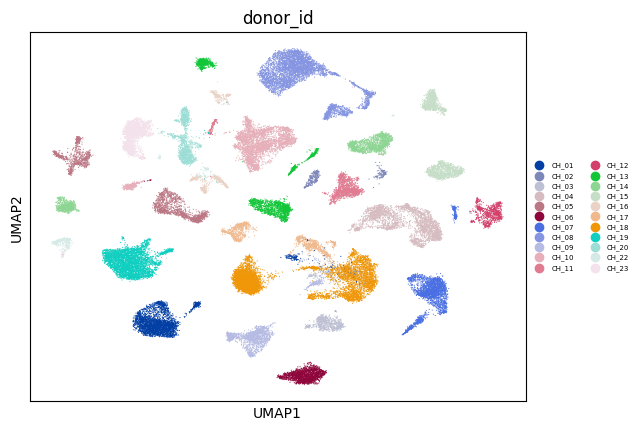

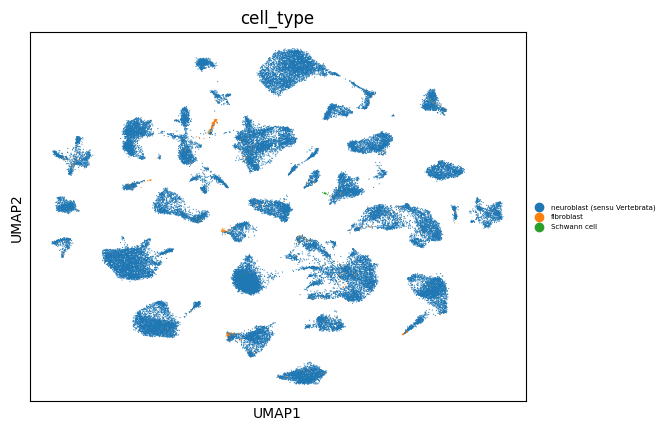

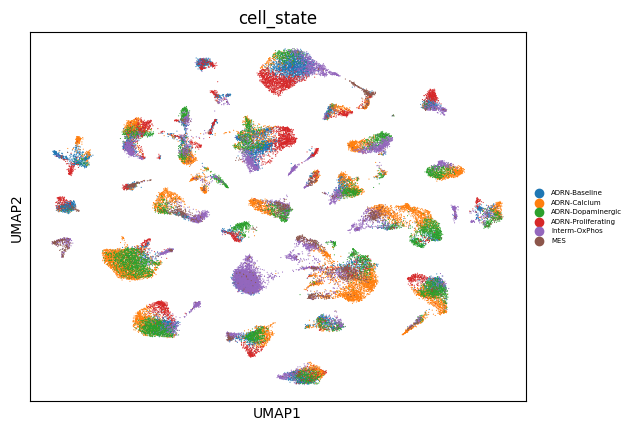

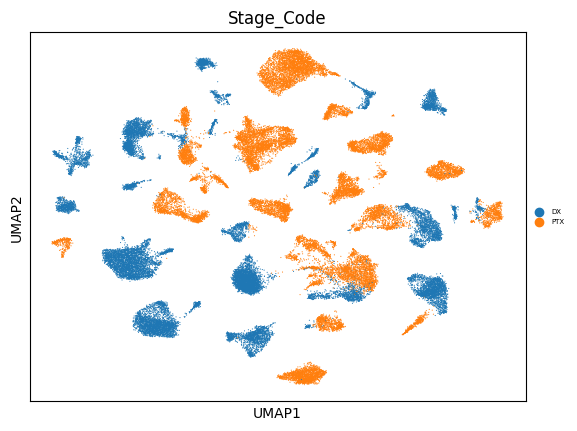

In [21]:
#UMAP plot before model
sc.pp.neighbors(adata)
sc.tl.umap(adata)
for feature in umap_obs:
    sc.pl.umap(adata, color=feature, legend_fontsize=5)

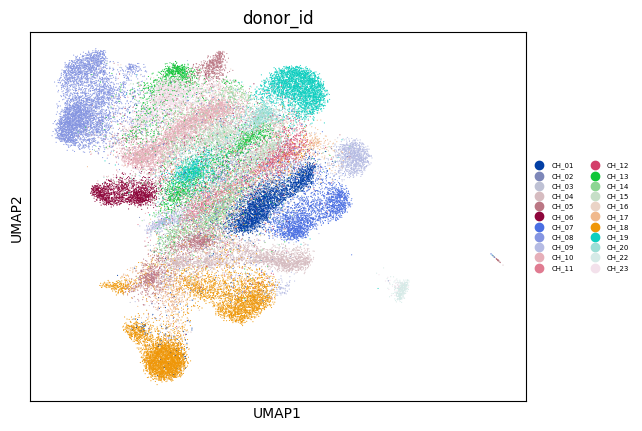

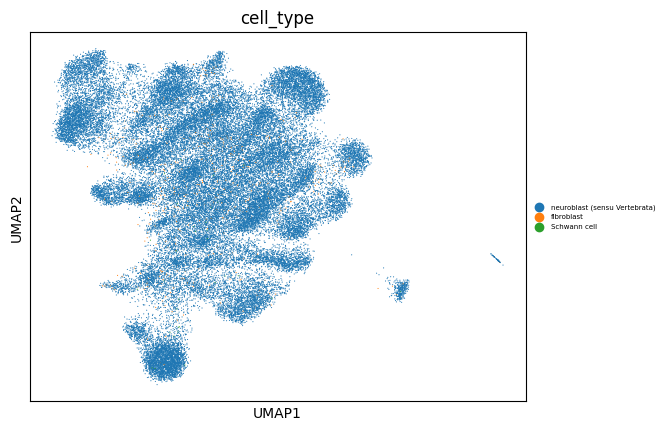

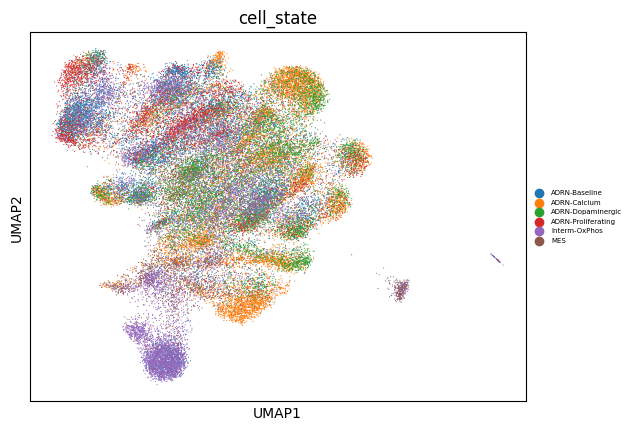

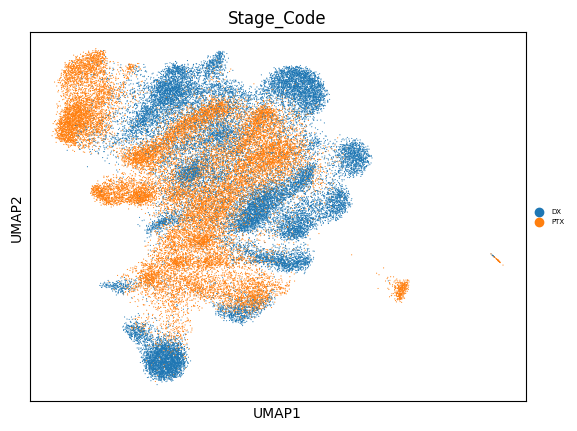

In [ ]:
#UMAP plot after model
sc.pp.neighbors(aembed)
sc.tl.umap(aembed)
for feature in umap_obs:
    sc.pl.umap(aembed, color=feature, legend_fontsize=5)